## <font color=lighblue> RESOLUCIÓN DE MODELOS MULTICOMPARTIMENTALES CON R</font>

***
<img src="http://univgim.hol.es/wordpress/wp-content/uploads/2013/08/escudo3-300x257.png" width="100" alt="" style="float:right;margin:15px;"> 
<div style="text-align: center">__Jose Enrique Martín García__</div>
 <div style="text-align: center">Universidad Politécnica de Gimialcón</div>
 <div style="text-align: center">*E-mail:jemartinster@gmail.com*</div>

## <div style="text-align: center"> <font color=darkorange >  <span style="font-family:Georgia; font-size:1.5em;">Resumen </span> </font> </div> 
 
><div style="text-align: center"><span style="font-family:Georgia; font-size:1em;"> *Muchos procesos pueden ser analizados matemáticamente por medio del Análisis compartimental o de cajas. Se trata de la descomposición de un proceso o fenómeno en un número finito de partes llamadas cajas o compartimentos que interactúan entre sí a través de intercambio de un flujo. El flujo puede consistir en transmisión de sustancias químicas, partículas, dinero, microbios, individuos de una población, etc. Matemáticamente va a consistir en un sistema de ecuaciones diferenciales ordinarias con coeficientes constantes.*</span> </div>
><div style="text-align: center"> <span style="font-family:Georgia; font-size:1em;">*
El análisis compartimental tiene numerosas aplicaciones en ecología, farmacia, reacciones químicas, economía, dosimetría interna, etc.*</span> </div>
><div style="text-align: center"> <span style="font-family:Georgia; font-size:1em;">*
Recientemente se han implementado en R varios métodos para resolución de ecuaciones diferenciales entre los que se incluye el paquete deSolve (soetaert, Petzoldt and Setzer 2010). Que contiene funciones para resolución de problemas de ecuaciones diferenciales con valores iniciales.*</span> </div> 


### <font color=darkorange >1. INTRODUCCIÓN. </font>
Un modelo compartimental normalmente se representa por un diagrama de bloques, donde los bloques, cajas o compartimentos se representan por circunferencias, o cuadriláteros, y por flechas los intercambios de compartimentos entre sí y entre los compartimentos y el exterior.


<img src="https://github.com/JoseEnrique04/Images/blob/master/compartimen1.png?raw=true" width="550" alt="" style="float:center;">
<font color=lighblue> **_Figura 1 Modelo compartimental de dos elementos_**</font>

Un ejemplo muy simple es el formado por dos compartimentos como se  muestra en la Figura 1. Este modelo está formado por los compartimentos 1 y 2, con entrada en ambos compartimentos representadas por las funciones, $I_1(t)$ y $I_2(t)$. De forma general suponemos que hay transferencias desde 1 a 2 y desde 2 a 1, con coeficientes de transferencia, respectivos, $k_{12}$ y $k_{21}$.

Desde los compartimentos además hay eliminación hacia el exterior representados por los coeficientes $k_{10}$ y $k_{20}$.

La evolución de la magnitud que se quiera contralar en cada compartimento (nº de partículas, dinero, nº de virus, sustancias químicas, microbios, gallinas, etc.) vendrá dada por:

**En el compartimento 1:**

$$\frac{dC_1}{dt}=Entradas·a·C_1-Salidas·de·C_1$$.

**En el compartimento 2:**

$$\frac{dC_2}{dt}=Entradas·a·C_2-Salidas·de·C_2$$.


Las salidas del compartimento llevan signo negativo. Por ejemplo para el compartimento 1 la tasa de transferencia de 1 a 2 en el instante t viene dada por $k_{12}·C_1(t)$ y la salida de 1 al exterior viene dada por $k_{10}·C_1(t)$.

Las dos entradas al compartimento 1 son: una desde el compartimento 2 dada por $k_{21}·C_2(t)$  y otra desde el exterior del sistema dada por $I_1(t)$ (el exterior del sistema podría simularse como otro compartimento mas). Por tanto:

$$\frac{dC_1}{dt}=k_{21}·C_2(t)+I_1(t)-k_{12}·C_1(t)-k_{10}·C_1(t)$$

De la misma forma para el compartimento 2, nos quedaría:

$$\frac{dC_2}{dt}=k_{12}·C_1(t)+I_2(t)-k_{21}·C_2(t)-k_{20}·C_2(t)$$

Estas ecuaciones junto con las condiciones iniciales: C1(0), C2(0), que representan la cantidad existente en cada compartimento en t = 0, constituyen lo que es el modelo compartimental.

**Ecuación general**

Extendiendo las ecuaciones anteriores a un sistema con n compartimentos y nos fijamos en el compartimento i, puede existir flujo entrante hacia i procedente desde otros compartimentos del sistema y desde el exterior; asimismo, puede existir flujo saliente por transferencias desde i hacia otros compartimentos del sistema, así como por salidas desde i hacia el exterior. Por tanto la dinámica de intercambio de material en este i-ésimo compartimento está dada por:

$$\frac{dC_2}{dt}=Tasa·de·flujo·que·entra-Tasa·de·flujo·de·sale$$.


Donde $C_i(t)$ es la cantidad presente en el compartimento i en cualquier instante t≥0. Esta ecuación es conocida como ecuación de balance de masa.

Al coeficiente de transferencia desde el compartimento i al compartimento j se denomina kij.
La tasa de transferencia desde i a j en el instante t viene dada por $k_{ij} C_i(t)$. El exterior del sistema se representa por “0”; por lo que el coeficiente de transferencia desde i al exterior es ki0, entonces la salida desde i al exterior en el instante t está dada por $k_{i0} C_i(t)$.

$$\frac{dC_1}{dt}= \sum_{j=1 \ j=i}^n k_{ji} C_j -C_i· \sum_{j=1}^n k_{ij}$$.



### <font color=darkorange >2 RESOLUCIÓN DE MODELOS COMPARTIMENTALES </font>

La resolución de los sistemas compartimentales lineales con coeficientes constantes se puede abordar de distintas formas:

Por medio de técnicas clásicas, calculando autovalores y autovectores de sistemas de ecuaciones diferenciales con coeficientes constantes. Este método se aplica especialmente a los casos de incorporaciones al sistema puntuales (Ci(t)=C0, en t=0) o incorporaciones continuas constantes.

Utilizando métodos de transformada de Laplace especialmente cuando las incorporaciones al sistema son variables en el tiempo.

Utilizando métodos numéricos aplicables en sistemas en los procedimientos que los procedimientos 1 y 2 son de difíciles de utilizar.

Aplicación de fórmulas que dan la solución directa, obtenidas por algunos de los métodos anteriores, a sistemas que cumplen determinadas condiciones.

Existen programas informáticos de cálculo matemático que incluye la posibilidad de cálculo simbólico y numérico que facilitan la aplicación de los métodos anteriores a través de algoritmos que ya están implementados y permiten resolver  los sistemas de ecuaciones diferenciales de una forma muy sencilla. Entre estos programas cabe detacar: Mathematica (Wolfram 1999), Matlab, Mathcad, Octave y, por supuesto R.

Recientemente se han implementado en R varios métodos para resolución de ecuaciones diferenciales entre los que se incluye el paquete deSolve (Soetaert, Petzoldt and Setzer 2010), que contiene funciones para resolución de problemas de ecuaciones diferenciales con valores iniciales.


### 2.1 Desintegración radiactiva

En 1900 Rutherford sugirió que el ritmo de emisión radiactiva de una sustancia disminuye exponencialmente con el tiempo. 

**Los procesos radiactivos son aleatorios.** 

La velocidad de desintegración será el ritmo de cambio del número de núcleos radiactivos en función del tiempo transcurrido, es decir:

$$Velocidad· de·desintegración= \frac{N-N_0}{t-t_0} =\frac{ \Delta N}{\Delta t}$$.

Se puede comprobar (Rutherford y Soddy, 1902) que esta velocidad es proporcional al número de núcleos existentes, es decir:

$$\frac{ \Delta N}{\Delta t}=- \lambda ·N$$

donde λ es llamada constante de desintegración, característica de cada núcleo y cuyas unidades son, en el S.I., $s^{-1}$. Si reordenamos la ecuación y consideramos intervalos de tiempo infinitesimales, los incrementos pasan a diferenciales:
$$\frac{ \Delta N}{N}=- \lambda ·\Delta t →\frac{d N}{N}=- \lambda ·dt$$

Si queremos conocer el número de núcleos (N) que quedan después de un tiempo (t), siendo $N_0$ el número de núcleos al principio, debemos integrar

$$\int \frac{dN}{N}= \int - \lambda ·dt → ln \frac{N}{N_0}= -\lambda ·dt→ N= N_0 e^{- \lambda ·t}$$ 

Las dos últimas ecuaciones son dos formas de expresar la ley de desintegración radiactiva.

Desde el punto de vista del modelo multicompartimental, la desintegración radiactiva se puede interpretar como una transferencia al exterior. Así, para un isótopo de constante de desintegración radiactiva λ, la eliminación desde el compartimento i al exterior en el instante t está dada por $(k_{io}+ λ) C_i(t)$ siendo kio otra constante de eliminación o de transferencia al exterior desde el compartimento i.

Consideremos un radionúclido A que se desintegra en otro B. Podemos representar el fenómeno por dos compartimentos A→B.

Si el radionucleido B también es radiactivo podemos tener lo que denominamos series radiactivas; que es lo que pasa con  la desintegración inicial del 238U o 232Th que les siguen una serie de desintegraciones radioactivas.

La cantidad de núcleos hijos se determina mediante dos procesos: la desintegración radioactiva y  la acumulación radioactiva por la desintegración del núcleo progenitor, respectivamente.

Supongamos que tenemos dos radionucleidos el padre A con una constante de desintegración $λ_1$ y el hijo B con otra constante de desintegración diferente $λ_2$. Sean $N_1$ el número de átomos radiactivos del isótopo A y $N_2$ el número de átomos radiactivos del isótopo B. El sistema de ecuaciones diferenciales que rigen este proceso es:


$$\frac{dN_1}{dt}=- \lambda_1 ·N_1  ,        \frac{dN_2}{dt}=- \lambda_2 ·N_2 + \lambda_1 ·N_1  $$  


Las soluciones de las ecuaciones diferenciales serán:

$$N_1=N_1^0 ·e^{-\lambda_1·t}$$

$$N_2=  \frac{\lambda_1}{\lambda_2-\lambda_1}N_1^0 ·(e^{-\lambda_1·t}-e^{-\lambda_2·t})- N_2^0 ·e^{-\lambda_2·t}$$

Siendo $N_{10}$ y $N_{20}$ los número de átomos de los radionucleidos A y B respectivamente, en el instante t=0. 

Si aplica la condición inicial de que la el número de átomos del radionucleido B es cero en el tiempo inicial $(N_{20} = 0)$, resulta:

$$N_2=  \frac{\lambda_1}{\lambda_2-\lambda_1}N_1^0 ·(e^{-\lambda_1·t}-e^{-\lambda_2·t})$$

La actividad de un radionucleido i viene dada como:

$$A_i=\lambda_i·N_i$$

Por lo tanto la actividad de los radionucleidos A y B vendrá dada como.

$$A_1=\lambda_1·N_1=A_1^0 ·e^{-\lambda_1·t}$$

$$A_2= \lambda_2·N_2= \frac{\lambda_2}{\lambda_2-\lambda_1}A_1^0 ·(e^{-\lambda_1·t}-e^{-\lambda_2·t})$$

Se deduce que el cociente entre $λ_1$ y $λ_2$ es el factor dominante que determina la evolución de la actividad del núcleo hijo en función del tiempo. A continuación se mencionan brevemente los 3 casos posibles de este cociente.

### 2.2 Equilibrio secular
Este tipo de relación entre la actividad del núcleo progenitor y del hijo tiene lugar cuando el periodo radioactivo del núcleo progenitor es infinitamente más grande que la del núcleo hijo. Tal sucede por ejemplo con las relaciones entre los isótopos de largo periodo del uranio y el torio, 238U, 235U y 232Th y sus productos de desintegración:



<font color=darkorange >**$λ_1 << λ_2$**</font>

$A_2=A_1^0·(e^{-\lambda_1t}-e^{-\lambda_2t})$

Para $λ_1 =0$

$A_2=A_1^0·(1-e^{-\lambda_2t})$
 
Para t→∞ con $\lambda_2t →∞  $la actividad del radionucleido hijo B quedará:

$A_2=A_1^0·(e^{-\lambda_1t})=A_1$
 
La actividad tanto del progenitor como del hijo se igualan.

El programa en R es el siguiente


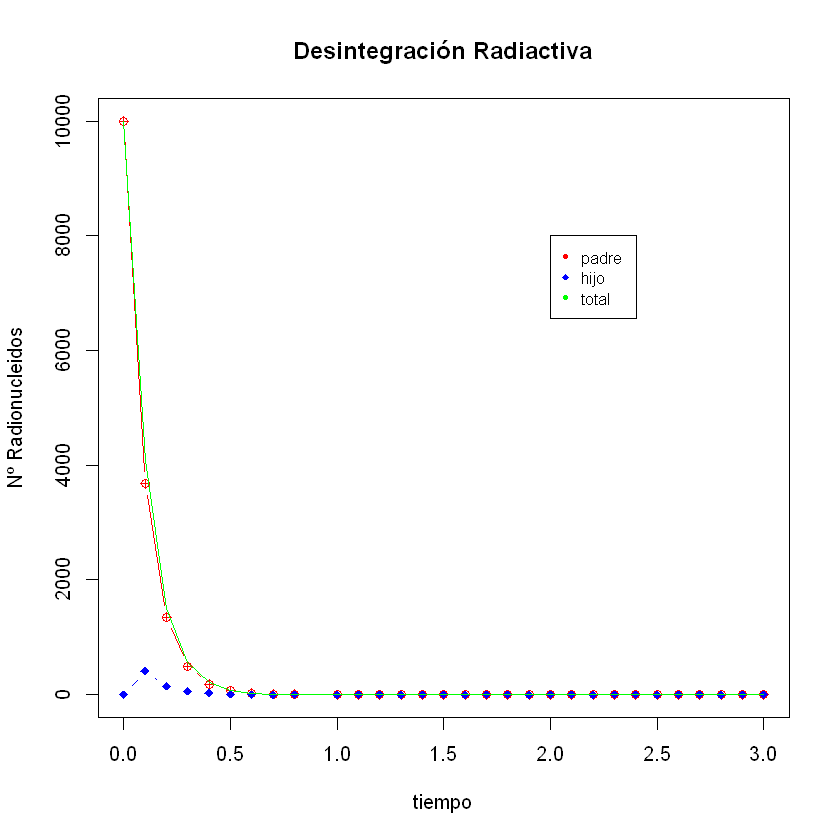

In [27]:
## Modelo multicompartimental
library(deSolve)
## definimos la ecuación diferencial
HIV_R <- function (pars, P_0 = 10000, H_0 = 0) {
 derivs <- function(time, y, pars) {
 with (as.list(c(pars, y)), {
 dP <- -lam1*P
 dH <-  lam1*P-lam2*H  
 return(list(c(dP, dH)))
 }) }
# CONDICIONES INICIALES
y <- c(P = P_0, H = H_0)
times <- c(seq(0, 0.8, 0.1), seq(1, 3, 0.1))
out <- ode(y = y, parms = pars, times = times, func = derivs)
as.data.frame(out)}
# Indicamos los valores de lambda 1 y 2 (solo ponemos)
pars <- c(lam1= 10., lam2 = 100.)
out <- HIV_R(pars = pars)
## 	DIBUJO DE LAS GRAFICAS 
## par(mfrow = c(2, 1))
plot(out$time, out$P, main = "Desintegración Radiactiva", ylab = "Nº Radionucleidos",
xlab = "tiempo", type = "b",pch=20, col="red")
lines(out$time, out$H, col="blue",pch=18,type = "b")
lines(out$time, out$H+out$P, col="green")
legend(2, 8000, c("padre", "hijo","total"), pch=c(20, 18),
 cex=.8, col=c("red", "blue","green"))


### 2.3 Equilibrio transitorio
En este caso, el periodo del núcleo progenitor continua siendo más grande que la del hijo aunque no infinitamente mayor:


<font color=darkorange >**$λ_1 < λ_2$**</font>

Si se considera la condición de que la actividad es cero en el tiempo cero, el crecimiento del núcleo hijo se expresa según:

$$A_2= \lambda_2·N_2= \frac{\lambda_2}{\lambda_2-\lambda_1}A_1^0 ·(e^{-\lambda_1·t}-e^{-\lambda_2·t})$$

Después de un tiempo suficiente como para que la actividad del núcleo descendiente
sea mayor que la del precursor se llegará, como era de esperar, a un estado estacionario.

$$A_2=\frac{\lambda_2}{\lambda_2-\lambda_1}A_1^0 ·e^{-\lambda_1·t}=\frac{\lambda_2}{\lambda_2-\lambda_1}A_1$$

En el programa en R anterior modificamos la siguiente línea:




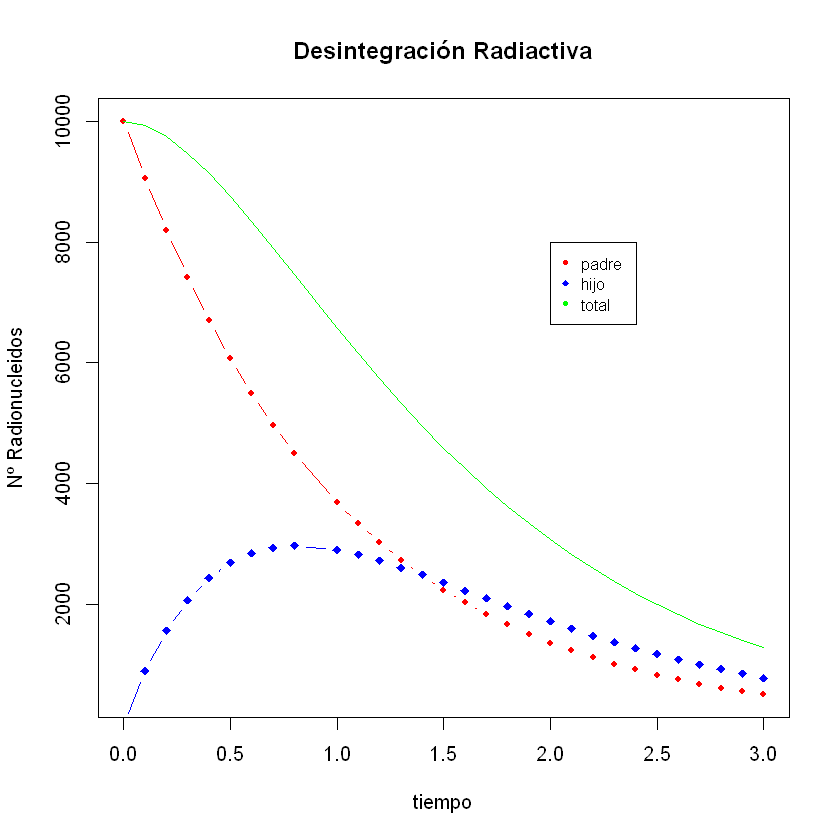

In [9]:
# Indicamos los valores de lambda 1 y 2 ()
# pars <- c(lam1= 10., lam2 = 100.)
pars <- c(lam1= 1., lam2 = 1.5)
out <- HIV_R(pars = pars)
## 	DIBUJO DE LAS GRAFICAS 
## par(mfrow = c(2, 1))
plot(out$time, out$P, main = "Desintegración Radiactiva", ylab = "Nº Radionucleidos",
xlab = "tiempo", type = "b",pch=20, col="red")
lines(out$time, out$H, col="blue",pch=18,type = "b")
lines(out$time, out$H+out$P, col="green")
legend(2, 8000, c("padre", "hijo","total"), pch=c(20, 18),
 cex=.8, col=c("red", "blue","green"))

### 2.4 No-equilibrio
En este caso el periodo radioactivo del núcleo hijo es mayor que la del progenitor:


<font color=darkorange >**$λ_1 > λ_2$**</font> 

La actividad del núcleo hijo crece según:

$$A_2= \frac{\lambda_2}{\lambda_2-\lambda_1}A_1^0 ·(e^{-\lambda_1·t}-e^{-\lambda_2·t})$$
 
Al final, después de un intervalo de tiempo suficientemente grande, sólo quedará la actividad del núcleo hijo, ya que la actividad del progenitor desaparece a una velocidad superior.
En el programa en R anterior modificamos la siguiente línea: 


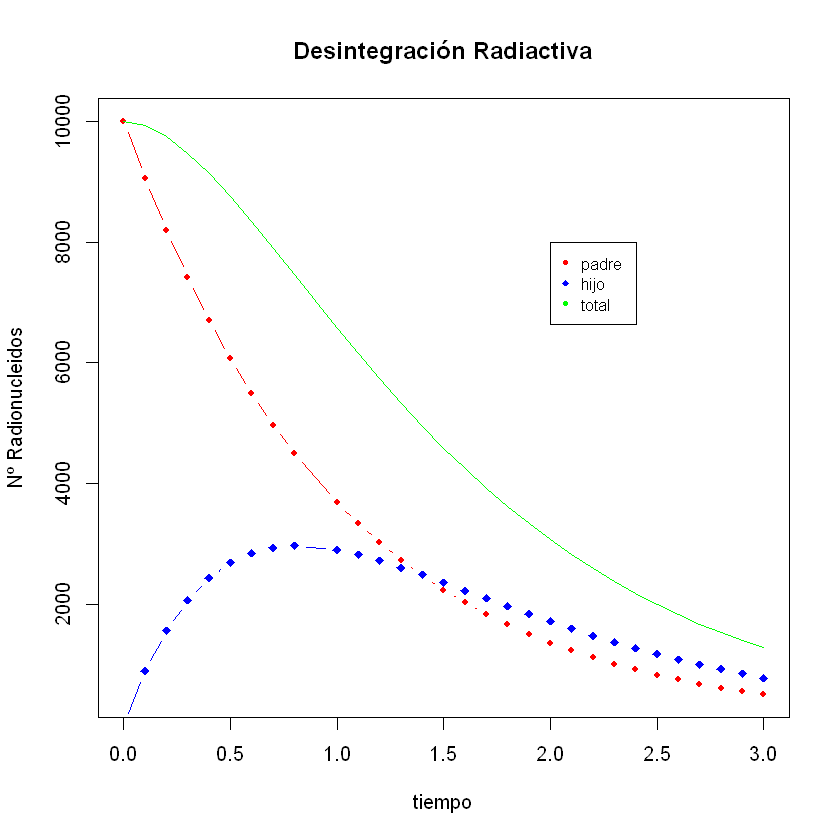

In [11]:
# Indicamos los valores de lambda 1 y 2 ()
# pars <- c(lam1= 10., lam2 = 100.)
pars <- c(lam1= 1., lam2 = 0.5)
## 	DIBUJO DE LAS GRAFICAS 
## par(mfrow = c(2, 1))
plot(out$time, out$P, main = "Desintegración Radiactiva", ylab = "Nº Radionucleidos",
xlab = "tiempo", type = "b",pch=20, col="red")
lines(out$time, out$H, col="blue",pch=18,type = "b")
lines(out$time, out$H+out$P, col="green")
legend(2, 8000, c("padre", "hijo","total"), pch=c(20, 18),
 cex=.8, col=c("red", "blue","green"))

###  <font color=darkorange >3 APLICACIÓN A LA DOSIMETRIA INTERNA. </font>

En dosimetría interna se utilizan modelos compartimentales para predecir la distribución de isótopos en el cuerpo humano. La Comisión Internacional de Protección Radiológica (siglas ICRP en ingles) utiliza modelos compartimentales con coeficientes de transferencia constante.
Podemos decir que para un isótopo y vía de incorporación concreto aplica un modelo compartimental que está caracterizado por un diagrama de flujo y por unos parámetros, constantes. El modelo resultante matemáticamente se representa por un sistema de ecuaciones diferenciales ordinarias de coeficientes constantes.

La determinación de las dosis resultantes de una contaminación interna requiere conocer el comportamiento metabólico de los radionucleidos incorporados para, a partir de ahí, caracterizar matemáticamente los procesos de retención y eliminación de dichos radionucleidos en el organismo. Evidentemente, dada la variedad de procesos que condicionan el metabolismo de los radionucleidos incorporados, dicha caracterización matemática va a resultar de gran complejidad y, por ello, no hay más remedio que aplicar hipótesis simplificadoras, que constituyen la base de los denominados “modelos biocinéticos”

Estos modelos multicompartimentales aumentan en complejidad en el caso que los radionucleidos incorporados presenten descendientes radiactivos. Para abordar esta problemática la ICRP viene asumiendo la hipótesis de que los descendientes radiactivos tienen el mismo comportamiento metabólico que el radionucleido precursor. Se asume que el radionúclido padre tiene un comportamiento metabólico similar al del isótopo estable de dicho radionucleido.
En la aplicación práctica de estos modelos las principales dificultades surgen a la hora de caracterizar los parámetros que regulan los procesos de transferencia entre compartimentos. Tal caracterización requiere considerar una gran variedad de aspectos que afectan tanto a las características del individuo contaminado (parámetros anatómicos, características fisiológicas, etc.), como al propio proceso de incorporación (vía de incorporación, forma física y química del contaminante, etc.).

### 3.1 Modelo metabólico del I-131 por ingestión

Para demostrar cómo se pueden implementar estos modelos en R vamos a realizar un ejercicio muy sencillo relacionado con el comportamiento del radionucleido I-131 en el cuerpo humano después de una ingestión accidental.

El modelo metabólico propuesto por la ICRP en su publicación nº 30 asume que el radionucleido pasa del estómago al intestino con un tiempo medio de retardo de 1h; donde pasa directamente a la sangre. Una fracción del yodo en la sangre (30%) pasa directamente al tiroides y el resto se excreta por la orina. Desde el tiroides el yodo se distribuye uniformemente por todo el cuerpo, donde el 90% pasa de nuevo a la sangre (formándose un ciclo). Los periodos medios de residencia en los diferentes compartimentos van a ser:

>Sangre: 	0,25 d.

>Cuerpo:	12 d.

>Tiroides:	80 d.	 

La figura 2 muestra el modelo metabólico del I-131 en adultos con los 6 compartimentos descritos anteriormente. Vamos a tener en cuenta que el I-131 tiene un periodo de semidesintegración de 8,04 días o lo que es lo mismo =ln(2)/8.04. La unidad en tiempo en que vamos a trabajar va a ser en días por lo que las constantes de transferencia entre compartimentos y la constante de decaimiento radiactivo las vamos a definir en (d-1)


<img src="https://github.com/JoseEnrique04/Images/blob/master/compartimen2.png?raw=true" width="550" alt="" style="float:center;">

<font color=lighblue> **_Figura 2 Modelo metabólico del I-131 por ingestión_**</font>

La implementación de este modelo en R es:


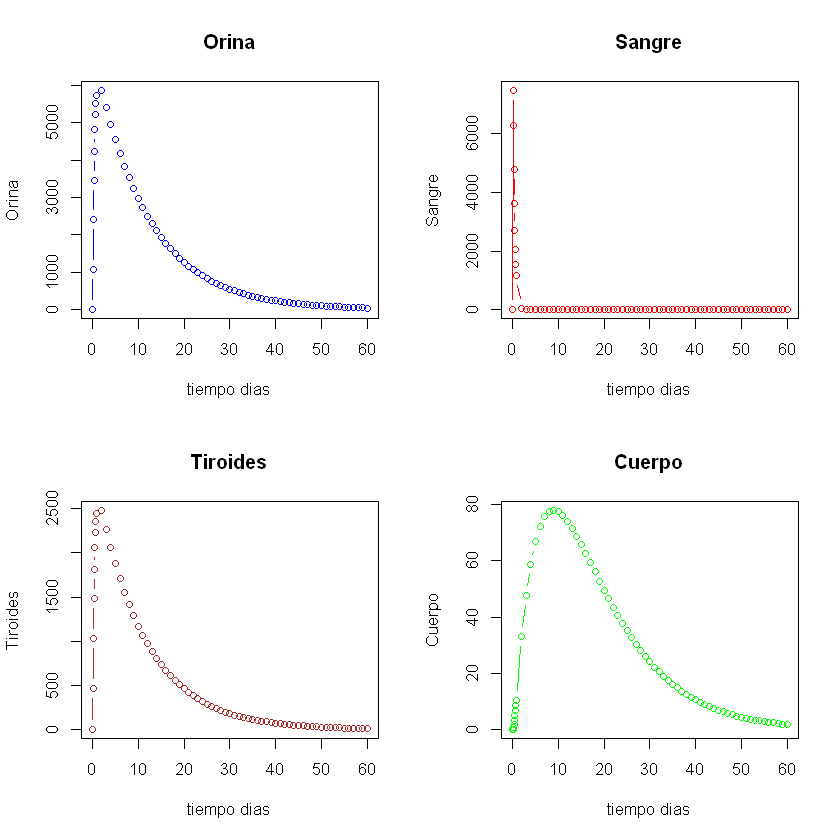

In [23]:
## Modelo multicompartimental I-131 Ingestion
library(deSolve)
## Actividad inicial  en cada compartimento
HIV_R <- function (pars,
 E_0 = 10000,
 S_0 = 0,
 T_0 = 0,
 C_0 = 0,
 O_0 = 0,
 H_0 = 0) {
derivs <- function(time, y, pars) {
 with (as.list(c(pars, y)), {
 dE <- -k1*E-lam*E
 dS <-  k1*E-lam*S + 0.9*k4*C - k2*S
 dT <-  0.3*k2*S - k3*T - lam*T
 dC <-  k3*T -k4*C - lam*C
 dO <-  0.7*k2*S - lam*O
 dH <-  0.1*k4*C - lam*H
 return(list(c(dE, dS, dT, dC, dO, dH)))
 })
 }
# CONDICIONES INICIALES
y <- c(E = E_0, S = S_0, T = T_0, C = C_0, O = O_0, H = H_0 )
# tiempos e intervalos de integración
times <- c(seq(0, 0.8, 0.1), seq(2, 60, 1))
out <- ode(y = y, parms = pars, times = times, func = derivs)
as.data.frame(out)
}
# parámetros de transferencia
pars <- c(k1 = 24., k2 = 2.77, k3 = 8.66E-03, k4 = 0.0577, lam = 0.0862, n = 900)
out <- HIV_R(pars = pars)
## 	DIBUJO DE LAS GRAFICAS
par(mfrow = c(2, 2))
plot(out$time, out$O, main = "Orina", ylab = "Orina",
xlab = "tiempo dias", type = "b",col="blue")
plot(out$time, out$S, main = "Sangre", ylab = "Sangre", 
xlab = "tiempo dias", type = "b",col="red")
plot(out$time, out$T, main = "Tiroides", ylab = "Tiroides",
xlab = "tiempo dias", type = "b",col="brown")
plot(out$time, out$C, main = "Cuerpo", ylab = "Cuerpo", 
xlab = "tiempo dias", type = "b",col="green")

<font color=lighblue> **_Figura 3 Evolución de la actividad del I-131 en diferentes partes del organismo por ingestión._**</font>


### <font color=darkorange >4 CONCLUSIONES </font>

Muchos procesos pueden ser analizados matemáticamente por medio del Análisis compartimental o de cajas. Matemáticamente va a consistir en un sistema de ecuaciones diferenciales ordinarias con coeficientes constantes.

R es un paquete informático tipo “Open Source” que actualmente se utiliza en las universidades y centros de investigación más prestigiosos del mundo. Recientemente se han implementado en R varios métodos para resolución de ecuaciones diferenciales entre los que se incluye el paquete deSolve (soetaert, Petzoldt and Setzer 2010).

El análisis compartimental tiene numerosas aplicaciones en ecología, farmacia, reacciones químicas, economía, dosimetría interna, etc.

En la ponencia se presentan dos ejemplos de resolución de modelos multicompartimentales con R aplicados a la Protección Radiológica.
